# EMPLOYEE CHURN PREDICTION

Cover the following topics:

* Data loading and understanding feature
* Exploratory data analysis 
* Data visualization
* Cluster analysis
* Building prediction model
* Evaluating model performance

# 1. Data loading and understanding feature

* In Research, it was found that employee churn will be affected by age, tenure, pay, job satisfaction, salary, working conditions, growth potential and employee’s perceptions of fairness. 
* Some other variables such as age, gender, ethnicity, education, and marital status, were essential factors in the prediction of employee churn. 
* In some cases such as the employee with niche skills are harder to replace. It affects the ongoing work and productivity of existing employees. 
* Acquiring new employees as a replacement has its costs such as hiring costs and training costs. 
* Also, the new employee will take time to learn skills at the similar level of technical or business expertise knowledge of an older employee. 
* Organizations tackle this problem by applying machine learning techniques to predict employee churn, which helps them in taking necessary actions.

# 2. Exploratory Analysis

# Importing Modules

In [50]:
import pandas as pd
import numpy as np # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs

# i.Loading Dataset

In [60]:
data=pd.read_csv("D:\credit_risk_modelling\HR_comma_sep.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3292\3571125089.py:1: SyntaxWarning: invalid escape sequence '\c'
  data=pd.read_csv("D:\credit_risk_modelling\HR_comma_sep.csv")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [52]:
data.head() # “head()”function of pandas library which returns first five observations.
#Here, Original data is separated by comma delimiter(“ , “) in given data set.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
data.tail() #“tail()” returns last five observations.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [54]:
data.info() # check attributes names and datatypes using info().

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [61]:
data.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Departments ',
 'salary']

In [58]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [62]:
data['Departments '].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [63]:
# Find the null values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

# ii. Expressing data

This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects).
No variable column has null/missing values.
You can describe 10 attributes in detail as:

* satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
* last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
* number_projects: How many numbers of projects assigned to an employee?
* average_monthly_hours: How many average numbers of hours worked by an employee in a month?
* time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
* work_accident: Whether an employee has had a work accident or not.
* promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
* Departments: Employee's working department/division.
* Salary: Salary level of the employee such as low, medium and high.
* left: Whether the employee has left the company or not.

# iii. Data Insights

There are two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [64]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 3. Data Visualization

# i. Employees Left

Check how many employees were left?

Here, a bar graph is plotted using Matplotlib. The bar graph is suitable for showing discrete variable counts.

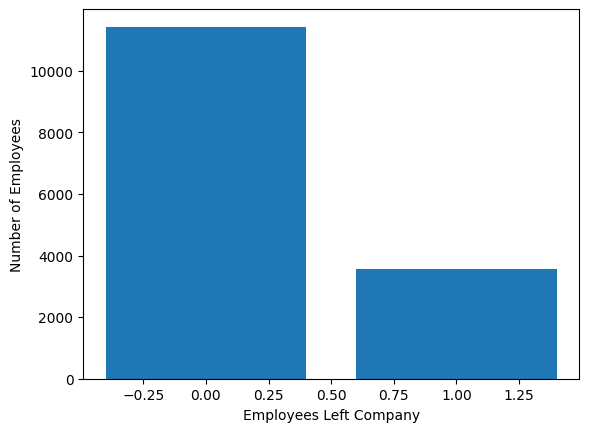

In [65]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [66]:
data.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

Here, out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

# ii. Number of Projects

Similarly, plot a bar graph to count the number of employees deployed on How many projects?

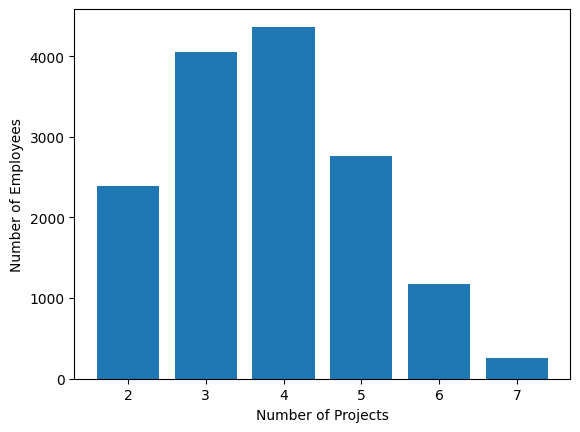

In [67]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing the project from 3-5.

# iii. Time Spent in Company

Similarly, plot a bar graph to count the number of employees have based on how much experience

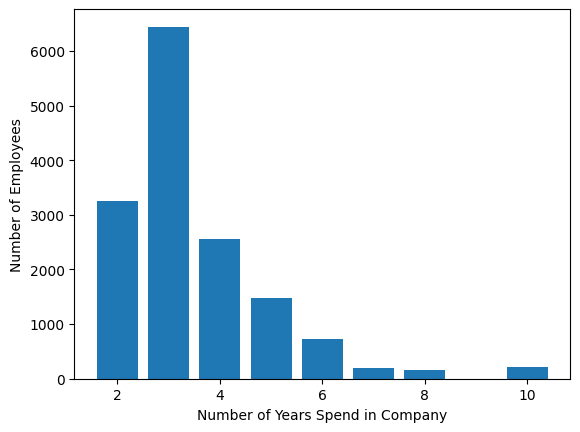

In [68]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

# iv. Subplots using Seaborn

This is how you can analyze the features one by one, but it will be time-consuming. The better option is here to use Seaborn library and plot all the graphs in a single run using subplots.

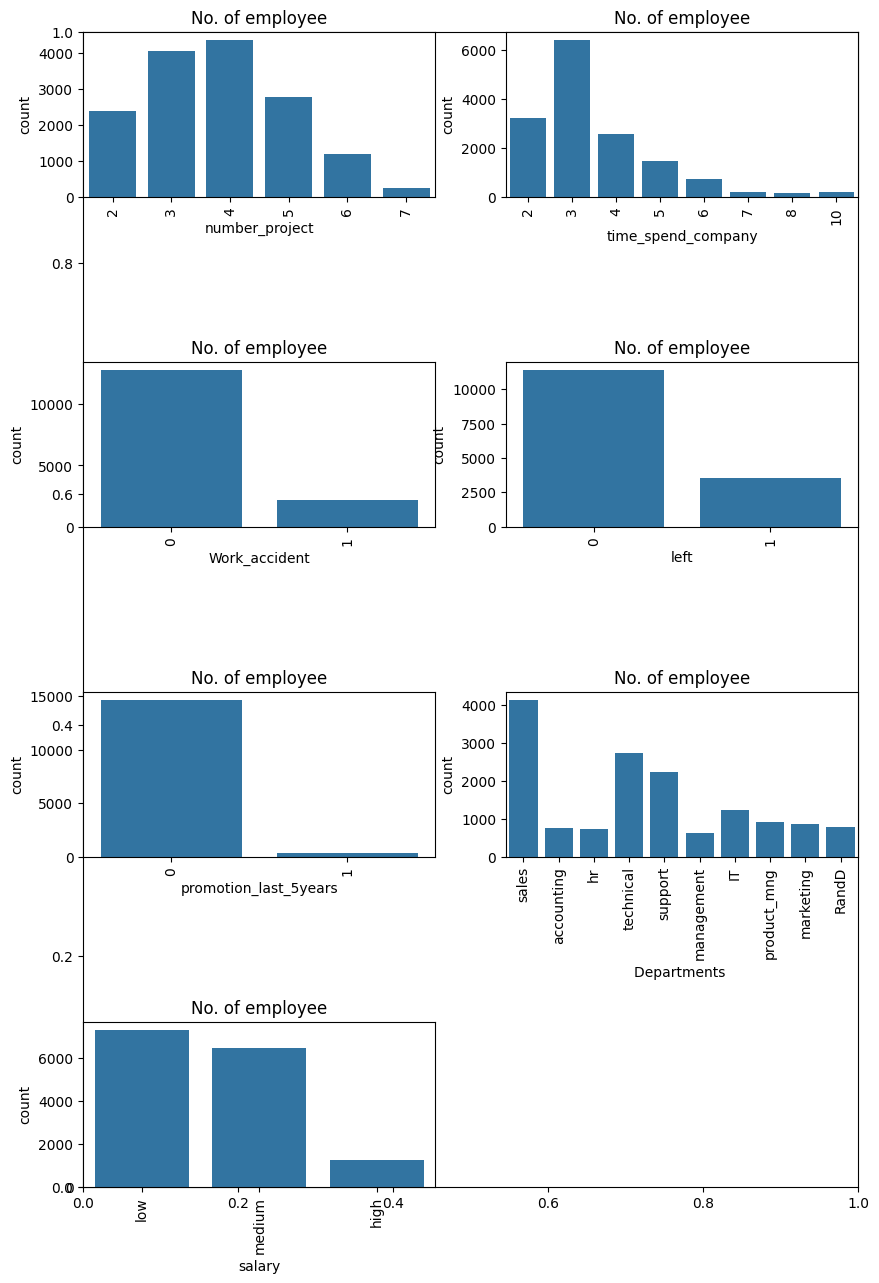

In [69]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Observated the following points in the above visualization:

* Most of the employee is doing the project from 3-5.
* There is a huge drop between 3 years and 4 years experienced employee.
* The no of employee left is 23 % of the total employment.
* A decidedly less number of employee get the promotion in the last 5 year.
* The sales department is having maximum no.of employee followed by technical and support
* Most of the employees are getting salary either medium or low.

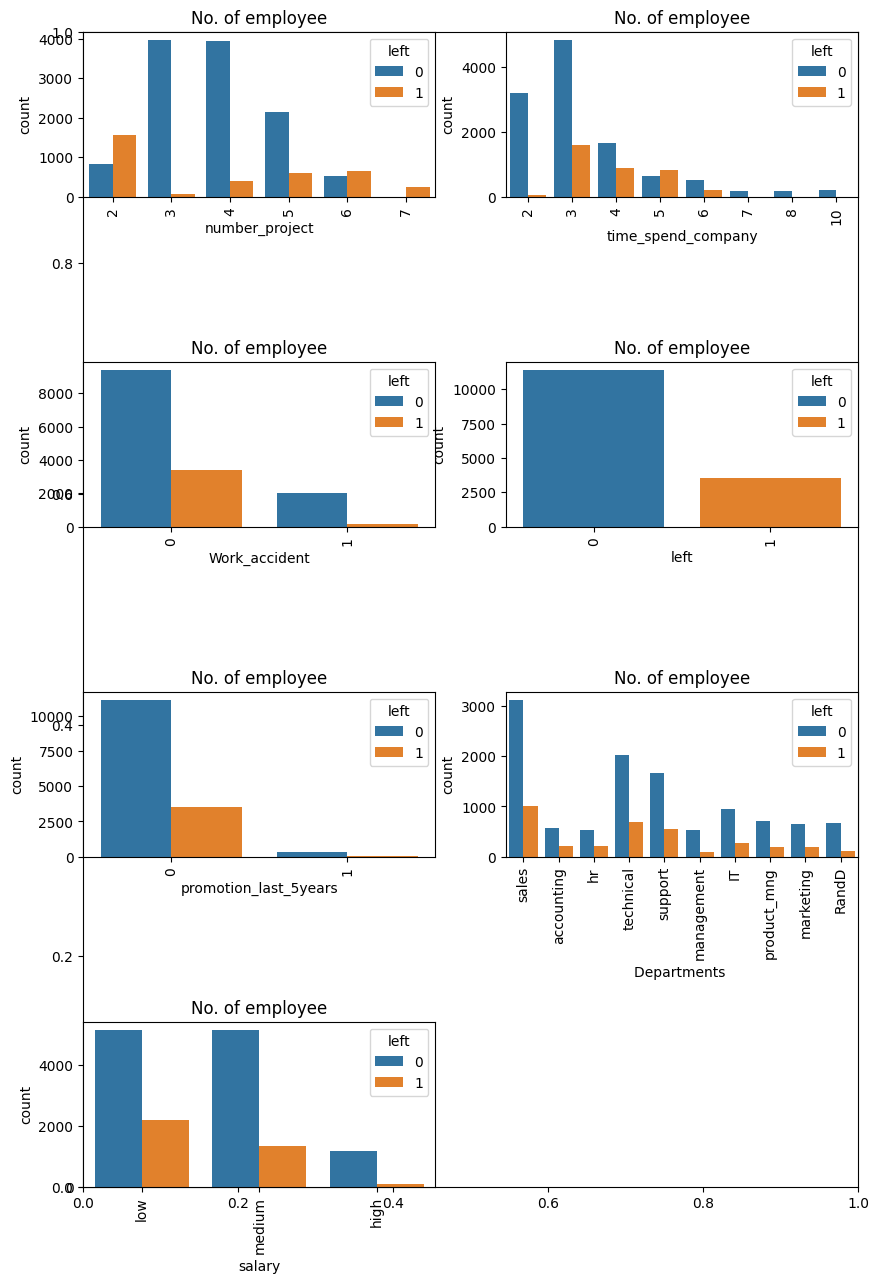

In [70]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Observed the following points in the above visualization:

* Those employees who have the number of projects more than 5 were left the company.
* The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
* The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
* Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

# v. Data Analysis and Visualization Summary:

Following features are most influencing a person to leave the company:

* Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.
* Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
* Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
* Salary: Most of the employees that quit among the mid or low salary groups.

# 4. Cluster Analysis:

Let's find out the groups of employees who left. The most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [71]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

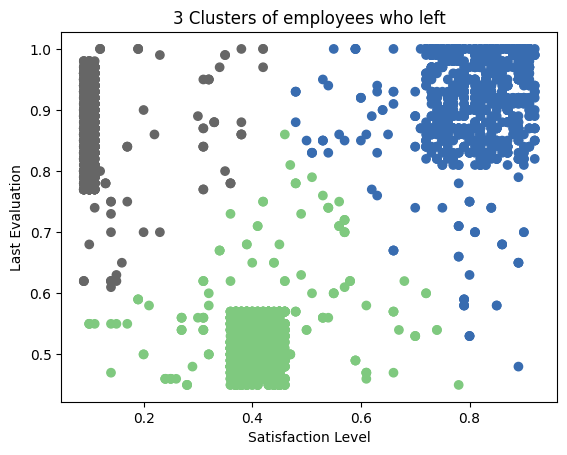

In [72]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

* High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
* Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
* Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

# 5. Building a Prediction Model using Gradient Boosting Tree, Random Forest, Logistic Regression, Ada boost, XG boost.

# i. Pre-Processing Data

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2.

This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder

In [79]:
data['employee_type']=''
# Write code here

data.loc[data['number_project']==2, 'employee_type'] = 'unburdened'
data.loc[(data['number_project']>=3) & (data['number_project']<=5) ,'employee_type'] = 'Satisfactory'
data.loc[data['number_project']>=6 , 'employee_type'] = 'Burdened'

data[['number_project', 'employee_type']].head()

,number_project,employee_type
0,2,unburdened
1,5,Satisfactory
2,7,Burdened
3,5,Satisfactory
4,2,unburdened


In [80]:
# Write the code here
data['satisfaction_level_type']=''
# Write the code here to make bins as mentioned above
data.loc[data['satisfaction_level']>=0.5, 'satisfaction_level_type'] = 'High'
data.loc[data['satisfaction_level']<0.5, 'satisfaction_level_type'] = 'Low'

data[['satisfaction_level', 'satisfaction_level_type']].head()

,satisfaction_level,satisfaction_level_type
0,0.38,Low
1,0.80,High
2,0.11,Low
3,0.72,High
4,0.37,Low


In [86]:
# Import LabelEncoder
from sklearn import preprocessing
data_OneHot = pd.get_dummies(data,columns=['Departments ','salary','satisfaction_level_type','employee_type'],drop_first=True,dtype=int)
data_OneHot.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments _RandD,Departments _accounting,...,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_low,salary_medium,satisfaction_level_type_Low,employee_type_Satisfactory,employee_type_unburdened
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1


In [87]:
data = data_OneHot.copy()

Here, you imported preprocessing module and created Label Encoder object. Using this LabelEncoder object you fit and transform "salary" and "Departments " column into numeric column.

# ii. Split Train and Test Set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [111]:
# Write code here
X=data.drop(['left'], axis=1)
Y=data['left']

from sklearn.model_selection import train_test_split
#Write code here
xtrain,xtest,ytrain,ytest =train_test_split(X,Y, test_size=0.2, random_state=42)
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(11999, 21) (11999,)
(3000, 21) (3000,)


# a) Using Random Forest

In [112]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier
# Making instance and training the model
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(xtrain,ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [113]:
rf_pred=clf_rf.predict(xtest)

'''Precision'''
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score
#Write the code to calculate
rf_precion= precision_score(ytest,rf_pred)
print("Precision: {}".format(rf_precion))

Precision: 0.9854862119013063


In [114]:
'''Accuracy'''
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score
# Write the code to calculate
rf_acc=accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(rf_acc))

Accuracy: 0.9876666666666667


In [115]:
'''Recall'''
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score
# Write the code to calculate
rf_recall=recall_score(ytest,rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.9617563739376771


In [116]:
'''F1-score'''
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score
# Write the code to calculate
rf_f1_score=f1_score(ytest,rf_pred)
print("F1 Score: {}".format(rf_f1_score))

F1 Score: 0.9734767025089606


In [117]:
'''Classification report'''
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



# b) Now using Logistic Regression

In [118]:
# Import the model
from sklearn.linear_model import LogisticRegression
# Create instance and train, random _state=42
lr_model = LogisticRegression(random_state=42)
lr_model.fit(xtrain, ytrain)

# get the predictions
lr_pred=pred = lr_model.predict(xtest)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report of logistic regression

In [122]:
'''Accuracy'''
#Write the code here
lr_accuracy=accuracy_score(ytest,pred)
print("Accuracy : {}".format(lr_accuracy))

Accuracy : 0.856


In [123]:
'''Precision'''
#Write the code here
lr_precision=precision_score(ytest,pred)
print("Precision : {}".format(lr_precision))

Precision : 0.7140625


In [124]:
'''Recall'''
#Write the code here
lr_recall= recall_score(ytest,pred)
print("Recall : {}".format(lr_recall))

Recall : 0.6473087818696884


In [125]:
'''F1-score'''
#Write the code here
lr_f1_score=f1_score(ytest,pred)
print("F1 Score : {}".format(lr_f1_score))

F1 Score : 0.6790490341753344


In [119]:
#Write the code here
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2294
           1       0.71      0.65      0.68       706

    accuracy                           0.86      3000
   macro avg       0.80      0.78      0.79      3000
weighted avg       0.85      0.86      0.85      3000



# c) Now using Ada boost

In [120]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier
#Write the code here to make an instance and train the model with random state =42
clf_adb = AdaBoostClassifier(random_state=42)
clf_adb.fit(xtrain, ytrain)

# Get the predictions
pred_clf_adb=clf_adb.predict(xtest)
pred_clf_adb

array([0, 0, 0, ..., 0, 0, 1], shape=(3000,))

In [126]:
'''Accuracy'''
#Write code here
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
ab_accuracy

0.8996666666666666

In [127]:
'''Precision'''
#Write code here
ab_precision= precision_score(ytest,pred_clf_adb)
ab_precision

0.835820895522388

In [128]:
'''Recall'''
#Write code here
ab_recall= recall_score(ytest,pred_clf_adb)
ab_recall

0.7138810198300283

In [129]:
'''F1-score'''
#Write code here
ab_f1_score=f1_score(ytest,pred_clf_adb)
ab_f1_score


0.7700534759358288

Classification Report

In [121]:
#Write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2294
           1       0.84      0.71      0.77       706

    accuracy                           0.90      3000
   macro avg       0.88      0.84      0.85      3000
weighted avg       0.90      0.90      0.90      3000



# d) Now using XG boost

In [137]:
#Write the code here to import the model
import xgboost as xgb

#Write the code here to make an instance and train the model with random state =100
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)
clf_xgb.fit(xtrain, ytrain)

# Get the predictions
pred_clf_xgb = clf_xgb.predict(xtest)
pred_clf_xgb

array([0, 0, 0, ..., 0, 0, 1], shape=(3000,))

In [138]:
'''Accuracy'''
#Write code here
xgb_accuracy= accuracy_score(ytest,pred_clf_xgb)
print("Accuracy: {}".format(xgb_accuracy))

Accuracy: 0.986


In [139]:
'''Precision'''
#Write code here
xgb_precision= precision_score(ytest,pred_clf_xgb)
xgb_precision

0.9797687861271677

In [140]:
'''Recall'''
#Write code here
xgb_recall=  recall_score(ytest,pred_clf_xgb)
xgb_recall

0.9603399433427762

In [141]:
'''F1-score'''
#Write code here
xgb_f1_score=f1_score(ytest,pred_clf_xgb)
xgb_f1_score

0.9699570815450643

In [142]:
'''Classification Report'''
#Write code here
print(classification_report(ytest,pred_clf_xgb))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



# e) Now using Gradient Boosting Classifier

In [143]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier()
#Train the model using the training sets
clf_gb.fit(xtrain, ytrain)

#Predict the response for test dataset
pred_clf_gb = clf_gb.predict(xtest)
pred_clf_gb

array([0, 0, 0, ..., 0, 0, 1], shape=(3000,))

In [144]:
'''Accuracy'''
#Write code here
gb_accuracy= accuracy_score(ytest,pred_clf_gb)
print("Accuracy: {}".format(gb_accuracy))

Accuracy: 0.971


In [145]:
'''Precision'''
#Write code here
gb_precision= precision_score(ytest,pred_clf_gb)
gb_precision

0.9558173784977909

In [146]:
'''Recall'''
#Write code here
gb_recall=  recall_score(ytest,pred_clf_gb)
gb_recall

0.9192634560906515

In [147]:
'''F1-score'''
#Write code here
gb_f1_score=f1_score(ytest,pred_clf_gb)
gb_f1_score

0.9371841155234657

In [148]:
'''Classification Report'''
#Write code here
print(classification_report(ytest,pred_clf_gb))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2294
           1       0.96      0.92      0.94       706

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



# 6. Evaluate Model Performance and Result Comparisons
#Do the comparison of the above used models as per the scores found. Make a dataframe that shows the models and scores for each models.

In [151]:
comparison_dict={"Algorithm":["Random Forest","Logistic Regression","XGBoost","Ada Boost","Gradient Boost Classifier"],
                 "Accuracy":[rf_acc,lr_accuracy,xgb_accuracy,ab_accuracy,gb_accuracy],
                 "Precision":[rf_precion,lr_precision,xgb_precision,ab_precision,gb_precision],
                 "Recall":[rf_recall,lr_recall,xgb_recall,ab_recall,gb_recall],
                 "F1 Score":[rf_f1_score,lr_f1_score,xgb_f1_score,ab_f1_score,gb_f1_score]
                }
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy','Precision','F1 Score'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.987667,0.985486,0.961756,0.973477
2,XGBoost,0.986000,0.979769,0.960340,0.969957
4,Gradient Boost Classifier,0.971000,0.955817,0.919263,0.937184
3,Ada Boost,0.899667,0.835821,0.713881,0.770053
1,Logistic Regression,0.856000,0.714063,0.647309,0.679049


# ....Final Conclusion: Random Forest model has the best score...

Well, out of all models, we got an highest accuracy of 98.77% from Random Forest classifier, which is considered as very good accuracy.

* Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your random forest classifier model predicted an employee is going to leave, that employee actually left 98.54% of the time.

* Recall: If there is an employee who left present in the test set and your random forest model can identify it 96.17% of the time.